# Data Analysis with Animal Shelter Data


![image.png](https://imgstaticcontent.lbb.in/lbbnew/wp-content/uploads/sites/7/2016/07/010816_YODA-AnimalShelter.jpg?fm=webp&w=750&h=500&dpr=1)



Hello, in this project we will be analyzing the Austin Animal Shelter dataset, which I got from  [Kaggle](https://www.kaggle.com/jackdaoud/animal-shelter-analytics), we will be using python's pandas & numpy libraries for analysing the data and for visualizing using matplotlib & seaborn, all four of these libraries are very powerful tools for analysis.

We will try to extract insights about the animal shelter like what are the reasons these animals are arriving at the shelter, weather they are getting adopted or not, how many types of animals are in here and soo much more.



## Downloading the Dataset


In [1]:
!pip install opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:

dataset_url = 'https://www.kaggle.com/jackdaoud/animal-shelter-analytics' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rahul010101
Your Kaggle Key: ········


 13%|██████████                                                                   | 1.00M/7.67M [00:00<00:01, 6.23MB/s]

100%|█████████████████████████████████████████████████████████████████████████████| 7.67M/7.67M [00:02<00:00, 2.68MB/s]


The dataset has been downloaded and extracted.

In [4]:
# Change the directory to where the files are
data_dir = './animal-shelter-analytics'

In [5]:
import os
os.listdir(data_dir)

['Austin_Animal_Center_Intakes.csv',
 'Austin_Animal_Center_Outcomes.csv',
 'Austin_Animal_Center_Stray_Map.csv']

Let us save and upload our work to  before continuing.

In [6]:
project_name = "zerotopandas-course-project-animal-shelter-eda"

## Data Preparation and Cleaning

- Let's clean the dataset by exploring the it.



In [10]:
#loading the pandas and numpy libraries

import pandas as pd
import numpy as np

In [11]:
animals_intakes_df = pd.read_csv('./animal-shelter-analytics/Austin_Animal_Center_Intakes.csv')
animals_outcomes_df = pd.read_csv('./animal-shelter-analytics/Austin_Animal_Center_Outcomes.csv')
animals_stray_map_df = pd.read_csv('./animal-shelter-analytics/Austin_Animal_Center_Stray_Map.csv')

> - **We will explore each dataset one by one**

In [12]:
animals_intakes_df.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,10/21/2013 07:59:00 AM,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [13]:
animals_intakes_df.tail()


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
124115,A828158,Odin,01/08/2021 07:01:00 PM,01/08/2021 07:01:00 PM,2224 E Stassney in Austin (TX),Stray,Normal,Dog,Intact Male,10 months,Rottweiler Mix,Black/Tan
124116,A830183,NaN,03/03/2021 05:12:00 PM,03/03/2021 05:12:00 PM,6802 Bryonwood Drive in Austin (TX),Stray,Medical,Dog,Intact Female,1 month,Chihuahua Shorthair,White
124117,A830180,Gigi,03/03/2021 04:31:00 PM,03/03/2021 04:31:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Intact Female,9 years,Australian Cattle Dog/Belgian Malinois,Brown Brindle/White
124118,A830171,NaN,03/03/2021 05:13:00 PM,03/03/2021 05:13:00 PM,1310 West Howard Lane in Austin (TX),Stray,Normal,Dog,Intact Female,1 year,Plott Hound Mix,Brown Brindle/White
124119,A830181,Nona,03/03/2021 04:31:00 PM,03/03/2021 04:31:00 PM,Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,4 years,Domestic Shorthair Mix,White/Black


>- **Our dataset contains information from the month of October 2013 to March 2021**

In [14]:
animals_intakes_df.sample(5)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
17145,A710247,NaN,08/20/2015 11:37:00 AM,08/20/2015 11:37:00 AM,1315 W St Johns in Austin (TX),Stray,Normal,Other,Unknown,1 year,Raccoon Mix,Gray/Black
25307,A701881,Boots,05/05/2015 03:32:00 PM,05/05/2015 03:32:00 PM,2308 Perry Ave #106 in Austin (TX),Owner Surrender,Sick,Cat,Intact Male,1 year,Domestic Shorthair Mix,Orange Tabby
28868,A740312,*Nibbles,12/14/2016 05:57:00 PM,12/14/2016 05:57:00 PM,409 E William Cannon Dr in Austin (TX),Stray,Normal,Cat,Intact Male,2 months,Domestic Shorthair Mix,Blue Tabby
67270,A679212,NaN,05/17/2014 02:21:00 PM,05/17/2014 02:21:00 PM,909 W Village Ln in Austin (TX),Stray,Normal,Cat,Intact Female,1 weeks,Domestic Shorthair Mix,Tortie
8881,A703989,NaN,05/31/2015 12:45:00 PM,05/31/2015 12:45:00 PM,3407B Willow Springs in Austin (TX),Stray,Normal,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Black


In [15]:
animals_intakes_df.describe()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
count,124120,85069,124120,124120,124120,124120,124120,124120,124119,124120,124120,124120
unique,110926,19748,87660,87660,53703,6,10,5,5,52,2629,595
top,A721033,Max,09/23/2016 12:00:00 PM,09/23/2016 12:00:00 PM,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,564,64,64,22859,86455,107952,70447,40316,21794,30985,13034


In [16]:
animals_intakes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124120 entries, 0 to 124119
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124120 non-null  object
 1   Name              85069 non-null   object
 2   DateTime          124120 non-null  object
 3   MonthYear         124120 non-null  object
 4   Found Location    124120 non-null  object
 5   Intake Type       124120 non-null  object
 6   Intake Condition  124120 non-null  object
 7   Animal Type       124120 non-null  object
 8   Sex upon Intake   124119 non-null  object
 9   Age upon Intake   124120 non-null  object
 10  Breed             124120 non-null  object
 11  Color             124120 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB


>- **We can observe that there overall 124120 entries or rows, however the 'Name' column has 85069 entries other 39051 entries are nan in this case there are 12k rows so we can drop the nans containing data** 

In [17]:
animals_intakes_df.isna().sum() #checking for nans

Animal ID               0
Name                39051
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         1
Age upon Intake         0
Breed                   0
Color                   0
dtype: int64

In [18]:
animals_intakes_df.dropna(inplace=True)  #dropping nans using panda's dropna()

In [19]:
animals_intakes_df.info() #fixed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85068 entries, 0 to 124119
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Animal ID         85068 non-null  object
 1   Name              85068 non-null  object
 2   DateTime          85068 non-null  object
 3   MonthYear         85068 non-null  object
 4   Found Location    85068 non-null  object
 5   Intake Type       85068 non-null  object
 6   Intake Condition  85068 non-null  object
 7   Animal Type       85068 non-null  object
 8   Sex upon Intake   85068 non-null  object
 9   Age upon Intake   85068 non-null  object
 10  Breed             85068 non-null  object
 11  Color             85068 non-null  object
dtypes: object(12)
memory usage: 8.4+ MB


In [20]:
animals_intakes_df.sample(5)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
25233,A679597,Bruno,01/24/2018 01:12:00 PM,01/24/2018 01:12:00 PM,6102 Caroline in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Labrador Retriever,Black/White
44645,A750194,Honey,05/24/2017 09:49:00 AM,05/24/2017 09:49:00 AM,Del Valle (TX),Owner Surrender,Normal,Cat,Intact Female,1 month,Domestic Shorthair Mix,Orange Tabby/White
66440,A696650,Kitkat,02/09/2015 01:11:00 PM,02/09/2015 01:11:00 PM,Verra Drive & Springdale Road in Austin (TX),Stray,Normal,Dog,Intact Female,14 years,Dachshund,Brown
50654,A786806,*Scout,01/02/2019 12:18:00 PM,01/02/2019 12:18:00 PM,501 South Highway 183 in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Australian Kelpie Mix,Black/Brown
7527,A700282,Keno,04/11/2015 11:21:00 AM,04/11/2015 11:21:00 AM,Austin (TX),Stray,Normal,Dog,Neutered Male,5 years,Siberian Husky Mix,Red


>- **The data also has 'DateTime' column which we can use to gain more insights but currently it is object datatype which needs to be converted to datetime datatype so that we can use it properly**

In [21]:
animals_intakes_df['date'] = pd.to_datetime(animals_intakes_df.DateTime)

**Adding columns(IntakeYear, IntakeMonth, IntakeDay, IntakeWeekday, IntakeHour) from date for our data visualisations**

In [22]:
animals_intakes_df['IntakeYear'] = pd.DatetimeIndex(animals_intakes_df.date).year
animals_intakes_df['IntakeMonth'] = pd.DatetimeIndex(animals_intakes_df.date).month
animals_intakes_df['IntakeDay'] = pd.DatetimeIndex(animals_intakes_df.date).day
animals_intakes_df['IntakeWeekday'] = pd.DatetimeIndex(animals_intakes_df.date).weekday
animals_intakes_df['IntakeHour'] = pd.DatetimeIndex(animals_intakes_df.date).hour

In [23]:
animals_intakes_df.head(5)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,date,IntakeYear,IntakeMonth,IntakeDay,IntakeWeekday,IntakeHour
0,A786884,*Brock,01/03/2019 04:19:00 PM,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,2019-01-03 16:19:00,2019,1,3,3,16
1,A706918,Belle,07/05/2015 12:59:00 PM,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,2015-07-05 12:59:00,2015,7,5,6,12
2,A724273,Runster,04/14/2016 06:43:00 PM,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White,2016-04-14 18:43:00,2016,4,14,3,18
4,A682524,Rio,06/29/2014 10:38:00 AM,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,2014-06-29 10:38:00,2014,6,29,6,10
5,A743852,Odin,02/18/2017 12:46:00 PM,02/18/2017 12:46:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 years,Labrador Retriever Mix,Chocolate,2017-02-18 12:46:00,2017,2,18,5,12


In [24]:
animals_intakes_df.drop(columns=['MonthYear'], inplace=True) #dropping 'MonthYear' column as we got the same from 'date' column

In [25]:
animals_intakes_df.columns

Index(['Animal ID', 'Name', 'DateTime', 'Found Location', 'Intake Type',
       'Intake Condition', 'Animal Type', 'Sex upon Intake', 'Age upon Intake',
       'Breed', 'Color', 'date', 'IntakeYear', 'IntakeMonth', 'IntakeDay',
       'IntakeWeekday', 'IntakeHour'],
      dtype='object')

>- **Now the exploring the animals_outcomes_df dataset**

In [26]:
animals_outcomes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124491 entries, 0 to 124490
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124491 non-null  object
 1   Name              85466 non-null   object
 2   DateTime          124491 non-null  object
 3   MonthYear         124491 non-null  object
 4   Date of Birth     124491 non-null  object
 5   Outcome Type      124471 non-null  object
 6   Outcome Subtype   57308 non-null   object
 7   Animal Type       124491 non-null  object
 8   Sex upon Outcome  124490 non-null  object
 9   Age upon Outcome  124486 non-null  object
 10  Breed             124491 non-null  object
 11  Color             124491 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB


In [27]:
animals_outcomes_df.head(5)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,08/16/2020 11:38:00 AM,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [28]:
animals_outcomes_df.sample(5)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
94002,A700980,*Cassie,04/28/2015 12:00:00 AM,04/28/2015 12:00:00 AM,02/11/2015,Transfer,Partner,Dog,Spayed Female,2 months,Carolina Dog Mix,Tan
99085,A681632,*Clancy,07/22/2014 02:13:00 PM,07/22/2014 02:13:00 PM,06/19/2009,Adoption,NaN,Dog,Neutered Male,5 years,Chihuahua Shorthair Mix,Black/Brown
56737,A781895,*Ally,01/09/2019 12:28:00 PM,01/09/2019 12:28:00 PM,08/26/2018,Adoption,Foster,Cat,Spayed Female,4 months,Domestic Longhair Mix,Tortie
114967,A804032,*Puff,11/05/2019 07:59:00 AM,11/05/2019 07:59:00 AM,08/09/2019,Adoption,Foster,Cat,Spayed Female,2 months,Domestic Shorthair,Brown Tabby
71027,A726350,Rex,05/14/2016 02:01:00 PM,05/14/2016 02:01:00 PM,03/19/2016,Transfer,Partner,Cat,Intact Male,1 month,Snowshoe Mix,Lynx Point/White


>- **The 'Name' ,'Outcome Type' ,'Outcome Subtype'  columns have missing values, so lets try to fix them**

**Again we can simply drop rows having missing values**

In [29]:
animals_outcomes_df.isna().sum()

Animal ID               0
Name                39025
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type           20
Outcome Subtype     67183
Animal Type             0
Sex upon Outcome        1
Age upon Outcome        5
Breed                   0
Color                   0
dtype: int64

In [30]:
animals_outcomes_df.dropna(inplace=True)

In [31]:
animals_outcomes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28630 entries, 6 to 124471
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Animal ID         28630 non-null  object
 1   Name              28630 non-null  object
 2   DateTime          28630 non-null  object
 3   MonthYear         28630 non-null  object
 4   Date of Birth     28630 non-null  object
 5   Outcome Type      28630 non-null  object
 6   Outcome Subtype   28630 non-null  object
 7   Animal Type       28630 non-null  object
 8   Sex upon Outcome  28630 non-null  object
 9   Age upon Outcome  28630 non-null  object
 10  Breed             28630 non-null  object
 11  Color             28630 non-null  object
dtypes: object(12)
memory usage: 2.8+ MB


In [32]:
animals_outcomes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28630 entries, 6 to 124471
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Animal ID         28630 non-null  object
 1   Name              28630 non-null  object
 2   DateTime          28630 non-null  object
 3   MonthYear         28630 non-null  object
 4   Date of Birth     28630 non-null  object
 5   Outcome Type      28630 non-null  object
 6   Outcome Subtype   28630 non-null  object
 7   Animal Type       28630 non-null  object
 8   Sex upon Outcome  28630 non-null  object
 9   Age upon Outcome  28630 non-null  object
 10  Breed             28630 non-null  object
 11  Color             28630 non-null  object
dtypes: object(12)
memory usage: 2.8+ MB


>- **Our third or last dataset is good to go!**

In [33]:
animals_stray_map_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Animal ID       16 non-null     object
 1   Found Location  16 non-null     object
 2   At AAC          16 non-null     object
 3   Intake Date     16 non-null     object
 4   Type            16 non-null     object
 5   Looks Like      16 non-null     object
 6   Color           16 non-null     object
 7   Sex             16 non-null     object
 8   Age             16 non-null     object
 9   Image Link      16 non-null     object
dtypes: object(10)
memory usage: 1.4+ KB


In [34]:
animals_stray_map_df.sample(5)

,Animal ID,Found Location,At AAC,Intake Date,Type,Looks Like,Color,Sex,Age,Image Link
8,A829672,"AUSTIN 78744\n(30.186349, -97.738673)",Yes (come to the shelter),02/20/2021,Dog,Doberman Pinsch,Black/Tan,Intact Female,6 months,http://www.petharbor.com/pet.asp?uaid=ASTN.A82...
0,A814119,11800 GREEN GROVE DRIVE\nAUSTIN 78725\n(30.221...,Yes (come to the shelter),02/19/2021,Dog,Pit Bull,Brown Brindle,Neutered Male,3 years,http://www.petharbor.com/pet.asp?uaid=ASTN.A81...
3,A829713,10605 OLD LOCKHART ROAD\nAUSTIN 78747\n(30.128...,Yes (come to the shelter),02/21/2021,Dog,Doberman Pinsch,Black/Tan,Intact Female,6 months,http://www.petharbor.com/pet.asp?uaid=ASTN.A82...
10,A829721,"AUSTIN 78745\n(30.206782, -97.798214)",Yes (come to the shelter),02/22/2021,Dog,Toy Fox Terrier/Dachshund Longhair,Brown,Intact Male,2 years,http://www.petharbor.com/pet.asp?uaid=ASTN.A82...
12,A829726,"4434 FRONTIER TRAIL\nAUSTIN 78745\n(30.23124, ...",Yes (come to the shelter),02/22/2021,Dog,Rottweiler,Black/Brown,Intact Male,2 years,http://www.petharbor.com/pet.asp?uaid=ASTN.A82...


## Exploratory Analysis and Visualization

**Let's visual the data to understand it even better.**



**Let's begin by importing`matplotlib.pyplot` and `seaborn`.**

In [37]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [38]:
animals_intakes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85068 entries, 0 to 124119
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Animal ID         85068 non-null  object        
 1   Name              85068 non-null  object        
 2   DateTime          85068 non-null  object        
 3   Found Location    85068 non-null  object        
 4   Intake Type       85068 non-null  object        
 5   Intake Condition  85068 non-null  object        
 6   Animal Type       85068 non-null  object        
 7   Sex upon Intake   85068 non-null  object        
 8   Age upon Intake   85068 non-null  object        
 9   Breed             85068 non-null  object        
 10  Color             85068 non-null  object        
 11  date              85068 non-null  datetime64[ns]
 12  IntakeYear        85068 non-null  int64         
 13  IntakeMonth       85068 non-null  int64         
 14  IntakeDay         850

In [39]:
animals_intakes_df.sample(5)

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,date,IntakeYear,IntakeMonth,IntakeDay,IntakeWeekday,IntakeHour
59260,A564082,Layla,09/12/2019 03:48:00 PM,Alsatia Drive And Currin Lane in Austin (TX),Stray,Normal,Dog,Spayed Female,11 years,Pit Bull Mix,Brown Brindle/White,2019-09-12 15:48:00,2019,9,12,3,15
26803,A787081,Corazon,01/07/2019 01:10:00 PM,Austin (TX),Owner Surrender,Normal,Cat,Intact Male,4 months,Domestic Shorthair Mix,Black,2019-01-07 13:10:00,2019,1,7,0,13
17597,A459845,Precious,05/05/2014 11:34:00 AM,12058 East Applegate Dr in Austin (TX),Stray,Normal,Cat,Spayed Female,7 years,Snowshoe/Ragdoll,Seal Point/White,2014-05-05 11:34:00,2014,5,5,0,11
74966,A668790,*St. Nicks,12/18/2013 11:01:00 AM,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,2 months,Australian Shepherd Mix,Tricolor,2013-12-18 11:01:00,2013,12,18,2,11
73942,A706219,George,06/26/2015 05:47:00 PM,Austin (TX),Public Assist,Normal,Dog,Intact Male,5 months,Pit Bull Mix,Brown Brindle/White,2015-06-26 17:47:00,2015,6,26,4,17


In [40]:
animals_intakes_df['Intake Type'].unique()

array(['Stray', 'Owner Surrender', 'Public Assist', 'Euthanasia Request',
       'Abandoned', 'Wildlife'], dtype=object)

In [41]:
intake_df = animals_intakes_df.groupby(by=animals_intakes_df['Intake Type'])
intake_df = intake_df['Intake Type'].count()
intake_df

Intake Type
Abandoned               183
Euthanasia Request      234
Owner Surrender       22053
Public Assist          6809
Stray                 55755
Wildlife                 34
Name: Intake Type, dtype: int64

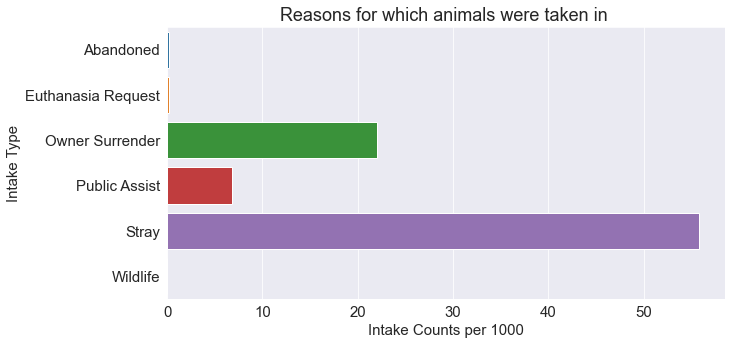

In [42]:
sns.barplot(y=intake_df.index, x=intake_df.values/1000)
#sns.lineplot(y=intake_df.index,x=intake_df.values/1000)
plt.xlabel('Intake Counts per 1000')
plt.title('Reasons for which animals were taken in ');

>- **From above plot we observe that most animals around 50k+ that were taken in by the shelter were strays, after that approximately 20k animals were surrenderd by their owners.**

In [43]:
animals_intakes_df['Animal Type'].unique()
animals_intakes_df['Sex upon Intake'].unique()



array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown'], dtype=object)

In [44]:
animals_type_df = animals_intakes_df.groupby('Animal Type') 
animals_type_df = animals_type_df['Animal Type'].count()
animals_type_df

Animal Type
Bird           126
Cat          25745
Dog          58366
Livestock        2
Other          829
Name: Animal Type, dtype: int64

In [45]:
a = list(animals_type_df.index)

In [46]:
b = list(animals_type_df.values)
b

[126, 25745, 58366, 2, 829]

In [47]:
import math
from functools import reduce
m =  reduce(lambda p,q:p+q, b)
n = list(map(lambda x:(x/m)*100 , b))
#n = list(map(lambda x:(x), n))
print("{0:.2f}%".format(n[0]))

perc_dict = {}

for i,j in zip(animals_type_df.index,n):
    perc_dict[i] = "{0:.2f}%".format(j)
perc_dict 

0.15%


{'Bird': '0.15%',
 'Cat': '30.26%',
 'Dog': '68.61%',
 'Livestock': '0.00%',
 'Other': '0.97%'}

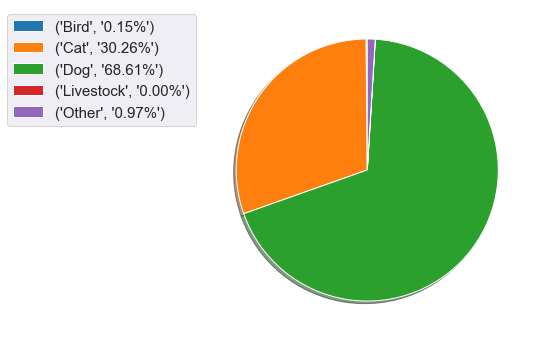

In [48]:
#plt.figure(figsize=(14,8))
plt.pie(b,explode=None,shadow=True, startangle=90)
plt.legend(perc_dict.items(),loc='upper right',bbox_to_anchor=(0, 1))
plt.tight_layout()

>- **Most animals at the shelter are domestic animals like cats & dogs, some are livestocks and some exotic species like birds.**

In [49]:
animals_sex_type_df = animals_intakes_df.groupby('Sex upon Intake') 
animals_sex_type_df = animals_sex_type_df['Sex upon Intake'].count()
animals_sex_type_df

Sex upon Intake
Intact Female    24612
Intact Male      27055
Neutered Male    17757
Spayed Female    15302
Unknown            342
Name: Sex upon Intake, dtype: int64

In [50]:
animals_intaketype_list = animals_intakes_df['Intake Type'].unique() 
animals_intaketype_list = list(animals_intaketype_list)

In [51]:
def plot_conditons(conditions):
    legend_lst = []
    
    for i in conditions:
        animals_condition_df = animals_intakes_df[animals_intakes_df['Intake Type'] == i].groupby('Intake Condition')
        print(i , animals_condition_df['Intake Condition'].count())
    
        animals_condition_df = animals_condition_df['Intake Condition'].count()
        plt.bar(animals_condition_df.index,animals_condition_df.values/1000)
        legend_lst.append(i)
    
    plt.xticks(rotation=75)
    plt.legend(legend_lst)
    plt.xlabel('Conditons in which animals were taken In')
    plt.ylabel('Count of Animals')
    plt.title('Distribution showing the reasons and conditions when an animal was taken In')

Stray Intake Condition
Aged          219
Behavior        6
Feral          28
Injured      3001
Medical        30
Normal      50292
Nursing       962
Other          87
Pregnant       28
Sick         1102
Name: Intake Condition, dtype: int64
Owner Surrender Intake Condition
Aged           93
Behavior       10
Feral           9
Injured       425
Medical        15
Normal      20599
Nursing       143
Other          39
Pregnant       12
Sick          708
Name: Intake Condition, dtype: int64
Public Assist Intake Condition
Aged          31
Behavior       4
Feral          1
Injured      142
Normal      6437
Nursing       43
Other         34
Pregnant       6
Sick         111
Name: Intake Condition, dtype: int64
Euthanasia Request Intake Condition
Aged       41
Injured    16
Normal     83
Other       1
Sick       93
Name: Intake Condition, dtype: int64
Abandoned Intake Condition
Injured      1
Medical      2
Normal     170
Nursing      7
Sick         3
Name: Intake Condition, dtype: int64
Wildlif

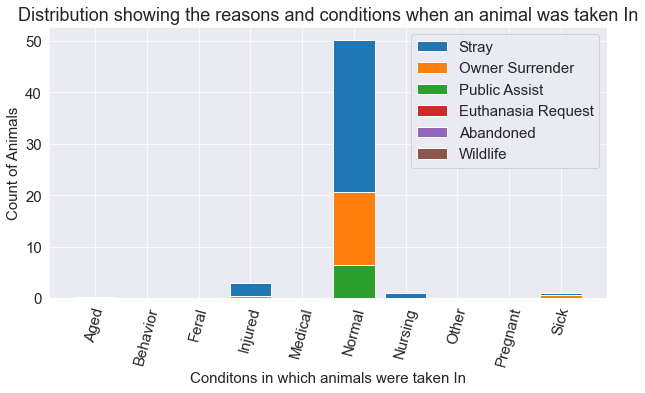

In [52]:
plot_conditons(animals_intaketype_list)

> - **We can easily infer from the above plot that many animals that were taken in by the shelter were normal, very few of them are sick or injured also we can see that majority of pet owners surrendered their pets to shelter due to personal reasons, not good :( !**

In [53]:
animals_intakes_df.sample(5)

,Animal ID,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,date,IntakeYear,IntakeMonth,IntakeDay,IntakeWeekday,IntakeHour
97155,A740994,Buddy,12/26/2016 03:13:00 PM,Austin (TX),Owner Surrender,Normal,Dog,Neutered Male,1 year,Rat Terrier/Chihuahua Shorthair,White/Black,2016-12-26 15:13:00,2016,12,26,0,15
57886,A797895,Mothra,06/19/2019 10:22:00 AM,Austin (TX),Owner Surrender,Normal,Bird,Intact Female,8 years,Dove,Gray/White,2019-06-19 10:22:00,2019,6,19,2,10
49002,A790413,Coco,03/09/2019 06:12:00 PM,183 And Mcneil in Austin (TX),Stray,Normal,Dog,Intact Female,1 year,English Bulldog,Chocolate/White,2019-03-09 18:12:00,2019,3,9,5,18
30850,A672458,Kilo,02/13/2014 06:51:00 PM,9300 Collinfield in Austin (TX),Public Assist,Normal,Dog,Intact Male,2 years,Dogo Argentino,White,2014-02-13 18:51:00,2014,2,13,3,18
1607,A733783,Kevin,08/27/2016 09:58:00 AM,Travis (TX),Owner Surrender,Normal,Dog,Intact Male,1 year,Labrador Retriever Mix,Black,2016-08-27 09:58:00,2016,8,27,5,9


In [54]:
animals_intakes_df['IntakeYear'].unique()
np.sort(animals_intakes_df['IntakeYear'].unique())

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [55]:
# a_13 = animals_intakes_df[animals_intakes_df['IntakeYear'] == 2020]

In [56]:
#a_13.groupby(by=['IntakeMonth']).count()

>- **We can leave the years 2013 and 2021, as our dataset contains information from the month of October 2013 to March 2021, so it will be good if analyze full yearly data only.**

In [57]:
intake_year_list = list(np.sort(animals_intakes_df['IntakeYear'].unique()))
intake_year_list.pop(0)
intake_year_list.pop(-1)
intake_year_list

[2014, 2015, 2016, 2017, 2018, 2019, 2020]

> - **We can plot a heatmap to see yearly trends, for that we need to create a dataframe that is something like this**

                                    year   month   values
                                    2020	Aug	  561
                                	2020	Sep	  575
                                	2020	Oct	  579
                                	2020	Nov	  412
                                	2020	Dec	  449


In [58]:
import calendar
yearly_df = pd.DataFrame()

df_dict = { 'year'  : [],
            'month' : [],
           'values' : []
            }

for i in intake_year_list:
    temp_year_df  =  animals_intakes_df[animals_intakes_df['IntakeYear'] == i]
    temp_month_df = temp_year_df.groupby('IntakeMonth').count()

    for p,q in zip((temp_month_df['Name'].index), (temp_month_df['Name'].values)):
        p = calendar.month_abbr[p]
        
        df_dict['year'].append(i)
        df_dict['month'].append(p)
        df_dict['values'].append(q)

        yearly_df = pd.DataFrame(data=df_dict, )
        
yearly_df.head()

,year,month,values
0,2014,Jan,984
1,2014,Feb,880
2,2014,Mar,955
3,2014,Apr,1012
4,2014,May,1249


In [59]:
yearly_df = yearly_df.pivot('month', 'year', 'values') 

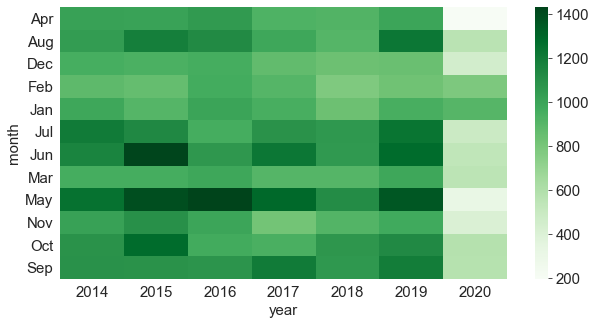

In [60]:
sns.heatmap(yearly_df,cmap='Greens');

> - **From the above heatmap, it is clear that around the months July & July, animals are being taken in large numbers from year 2014 to 2019 and during the month of may for the year 2014 to 2019 ,the shelter is heavily taking animals let it be stray, abandonded, surrenderd.**

>- **The shelter is least active in the year 2020 and that's maybe due to spread of covid-19, the staff must be working on limited workforce.**

In [61]:
animals_outcomes_df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
6,A814515,Quentin,05/06/2020 07:59:00 AM,05/06/2020 07:59:00 AM,03/01/2018,Adoption,Foster,Dog,Neutered Male,2 years,American Foxhound/Labrador Retriever,White/Brown
12,A803149,*Birch,08/31/2019 04:26:00 PM,08/31/2019 04:26:00 PM,08/08/2019,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair,Brown Tabby
13,A698049,Luigi,03/16/2015 02:50:00 PM,03/16/2015 02:50:00 PM,06/05/2014,Transfer,Partner,Cat,Spayed Female,9 months,Domestic Medium Hair Mix,Black/White
17,A765349,Einstein,06/08/2018 01:04:00 PM,06/08/2018 01:04:00 PM,01/18/2009,Adoption,Foster,Dog,Neutered Male,9 years,Chihuahua Shorthair Mix,Tricolor
18,A760697,Star,10/26/2017 03:22:00 PM,10/26/2017 03:22:00 PM,10/23/2007,Transfer,Partner,Dog,Intact Male,10 years,Yorkshire Terrier Mix,Brown/Black


In [62]:
breeds = list(animals_outcomes_df.Breed)
breeds = str(breeds)

In [63]:
!pip install wordcloud --quiet

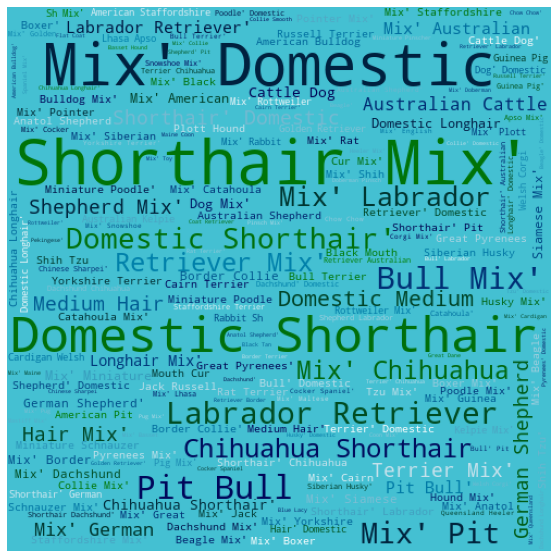

In [64]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off");
wordcloud = WordCloud(width = 500, height = 500, background_color='#44C0D2', colormap="ocean",  random_state=10).generate(breeds)
plot_cloud(wordcloud)

> - **The above plot or image , as many of you may know it, is called a word cloud**

*A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.*


> - **Most frequent breeds are emphasized with bigger and bolder letters**

## Asking and Answering Questions

Let us the begin the real deal, asking questions and trying to answer them!!!



#### Q1: Were there any sub reasons for which outcomes of animals was decided ??

In [67]:
animals_outcomes_df['Outcome Type'].unique() #checking outcomes type

array(['Adoption', 'Transfer', 'Euthanasia', 'Died', 'Return to Owner',
       'Missing'], dtype=object)

In [68]:
outcome_sub_df = animals_outcomes_df.groupby(by=['Outcome Type','Outcome Subtype'])
outcome_sub_df = outcome_sub_df['Outcome Subtype'].count()
print(outcome_sub_df)

print('**************************************')
print('\n\n','Total count of each outcome type:')
outcome_type_df = animals_outcomes_df.groupby('Outcome Type')
outcome_type_df = outcome_type_df['Outcome Type'].count()
print(outcome_type_df)

Outcome Type     Outcome Subtype    
Adoption         Foster                  9164
                 Offsite                  335
Died             At Vet                    38
                 Enroute                    7
                 In Foster                130
                 In Kennel                146
                 In Surgery                11
Euthanasia       Aggressive               479
                 At Vet                    55
                 Behavior                 142
                 Court/Investigation       29
                 Medical                   70
                 Rabies Risk              106
                 Suffering                781
Missing          In Foster                 18
                 In Kennel                  7
                 Possible Theft            15
Return to Owner  At Vet                     1
                 Customer S                 7
                 Field                     33
                 Foster                    

**ANSWER :**

In [69]:
outcome_list = outcome_sub_df.index[:][0]

outcome_list = list(map(lambda x:x[:][0],outcome_sub_df.index ))

outcome_list = list(set(outcome_list))

for i in outcome_list:
    a = outcome_sub_df[i].sum()
    b = outcome_sub_df[i][1:]
    
    print('Total animal count for {} was: {}, for the reasons:{}'.format(i,a,list(b.index)))

Total animal count for Adoption was: 9499, for the reasons:['Offsite']
Total animal count for Died was: 332, for the reasons:['Enroute', 'In Foster', 'In Kennel', 'In Surgery']
Total animal count for Transfer was: 17044, for the reasons:['Emer', 'Partner', 'SCRP', 'Snr']
Total animal count for Return to Owner was: 53, for the reasons:['Customer S', 'Field', 'Foster', 'Prc']
Total animal count for Missing was: 40, for the reasons:['In Kennel', 'Possible Theft']
Total animal count for Euthanasia was: 1662, for the reasons:['At Vet', 'Behavior', 'Court/Investigation', 'Medical', 'Rabies Risk', 'Suffering']


#### Q2:  Did  all animals were neutered or spayed after they were released from shelter , if not then what were the reason(s) for the same ??

*Both terms(spay and neuter) refer to the surgical sterilization of an animal, but sometimes neuter is used for both genders*

*By spaying or neutering your pet, you’ll help control the pet homelessness crisis, which results in millions of healthy dogs and cats being euthanized in certain countries each year, simply because there aren’t enough homes to go around. There are also medical and behavioral benefits to spaying (female pets) and neutering (male pets) your animals*

https://www.aspca.org/pet-care/general-pet-care/spayneuter-your-pet

In [70]:
animals_outcomes_df.groupby('Sex upon Outcome')['Sex upon Outcome'].count()

Sex upon Outcome
Intact Female     4321
Intact Male       3972
Neutered Male    10444
Spayed Female     9666
Unknown            227
Name: Sex upon Outcome, dtype: int64

In [71]:
#reasons for which female animals were not spayed 

intact_female_df = animals_outcomes_df[animals_outcomes_df['Sex upon Outcome'] == 'Intact Female'  ]
intact_female_df = intact_female_df.groupby(by=['Outcome Type','Outcome Subtype' ]).count()
intact_female_df = intact_female_df['Sex upon Outcome']
#intact_female_df

In [72]:
# for i,j in intact_female_df.items():
#     print(i)
#     print(j)

**ANSWER :**

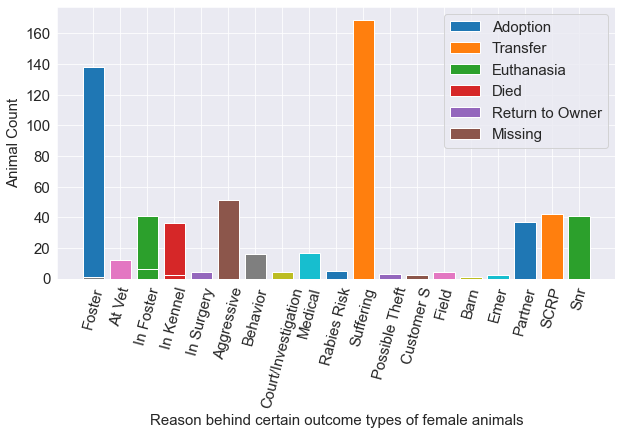

In [73]:
intact_female_df['Transfer']['Partner'] = intact_female_df['Transfer']['Partner']//100 #we have scaled this type to 'Partner per 100', as plotting graph directly will hide all types

plt.xticks(rotation=75)
for i,j in intact_female_df.items():
    plt.bar(i[1],j)
    
plt.xlabel('Reason behind certain outcome types of female animals')
plt.ylabel('Animal Count')
plt.legend(animals_outcomes_df['Outcome Type'].unique());

In [74]:
#reasons for which male animals were not neutered

intact_male_df = animals_outcomes_df[animals_outcomes_df['Sex upon Outcome'] == 'Intact Male']
intact_male_df = intact_male_df.groupby(by=['Outcome Type','Outcome Subtype' ]).count()
intact_male_df = intact_male_df['Sex upon Outcome']
#intact_male_df

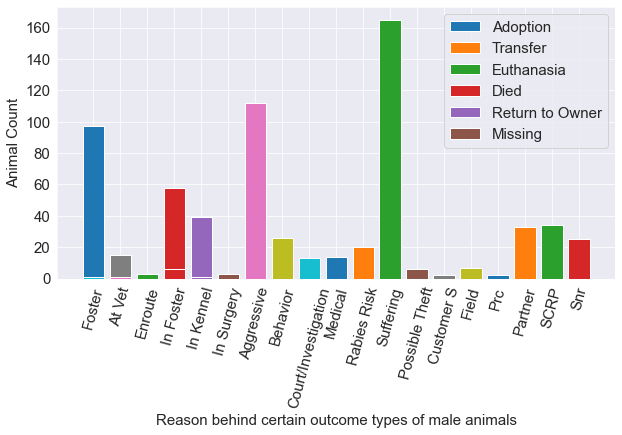

In [75]:
intact_male_df['Transfer']['Partner'] = intact_male_df['Transfer']['Partner']//100 #we have scaled this type to 'Partner per 100', as plotting graph directly will hide all types

plt.xticks(rotation=75)
for i,j in intact_male_df.items():
    plt.bar(i[1],j)
    
plt.xlabel('Reason behind certain outcome types of male animals')
plt.ylabel('Animal Count')
plt.legend(animals_outcomes_df['Outcome Type'].unique());

#### Q3: How many 6 years old or more animals are being released after receiving treatement, aid by the shelter ??

In [76]:
animals_outcomes_df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
6,A814515,Quentin,05/06/2020 07:59:00 AM,05/06/2020 07:59:00 AM,03/01/2018,Adoption,Foster,Dog,Neutered Male,2 years,American Foxhound/Labrador Retriever,White/Brown
12,A803149,*Birch,08/31/2019 04:26:00 PM,08/31/2019 04:26:00 PM,08/08/2019,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair,Brown Tabby
13,A698049,Luigi,03/16/2015 02:50:00 PM,03/16/2015 02:50:00 PM,06/05/2014,Transfer,Partner,Cat,Spayed Female,9 months,Domestic Medium Hair Mix,Black/White
17,A765349,Einstein,06/08/2018 01:04:00 PM,06/08/2018 01:04:00 PM,01/18/2009,Adoption,Foster,Dog,Neutered Male,9 years,Chihuahua Shorthair Mix,Tricolor
18,A760697,Star,10/26/2017 03:22:00 PM,10/26/2017 03:22:00 PM,10/23/2007,Transfer,Partner,Dog,Intact Male,10 years,Yorkshire Terrier Mix,Brown/Black


In [77]:
animals_outcomes_df['DOBdate'] = pd.to_datetime(animals_outcomes_df['Date of Birth'])
animals_outcomes_df['Shelterdate'] = pd.to_datetime(animals_outcomes_df.DateTime)

animals_outcomes_df['DOByear'] = pd.DatetimeIndex(animals_outcomes_df.DOBdate).year
animals_outcomes_df['Shelteryear'] = pd.DatetimeIndex(animals_outcomes_df.Shelterdate).year
animals_outcomes_df['Sheltermonth'] = pd.DatetimeIndex(animals_outcomes_df.Shelterdate).month

animals_outcomes_df['Current Age in years'] = animals_outcomes_df['Shelteryear'] - animals_outcomes_df['DOByear'] 

In [78]:
animals_outcomes_df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,DOBdate,Shelterdate,DOByear,Shelteryear,Sheltermonth,Current Age in years
6,A814515,Quentin,05/06/2020 07:59:00 AM,05/06/2020 07:59:00 AM,03/01/2018,Adoption,Foster,Dog,Neutered Male,2 years,American Foxhound/Labrador Retriever,White/Brown,2018-03-01,2020-05-06 07:59:00,2018,2020,5,2
12,A803149,*Birch,08/31/2019 04:26:00 PM,08/31/2019 04:26:00 PM,08/08/2019,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair,Brown Tabby,2019-08-08,2019-08-31 16:26:00,2019,2019,8,0
13,A698049,Luigi,03/16/2015 02:50:00 PM,03/16/2015 02:50:00 PM,06/05/2014,Transfer,Partner,Cat,Spayed Female,9 months,Domestic Medium Hair Mix,Black/White,2014-06-05,2015-03-16 14:50:00,2014,2015,3,1
17,A765349,Einstein,06/08/2018 01:04:00 PM,06/08/2018 01:04:00 PM,01/18/2009,Adoption,Foster,Dog,Neutered Male,9 years,Chihuahua Shorthair Mix,Tricolor,2009-01-18,2018-06-08 13:04:00,2009,2018,6,9
18,A760697,Star,10/26/2017 03:22:00 PM,10/26/2017 03:22:00 PM,10/23/2007,Transfer,Partner,Dog,Intact Male,10 years,Yorkshire Terrier Mix,Brown/Black,2007-10-23,2017-10-26 15:22:00,2007,2017,10,10


In [79]:
ages_df = animals_outcomes_df[animals_outcomes_df['Current Age in years'] >= 6]
ages_6_df = ages_df.groupby(by=['Animal Type' ])
ages_6_df = ages_6_df.count()['Name']



**ANSWER :**

In [80]:
ages_list = ages_6_df.values
ages_names = ages_6_df.index

for i,j in zip(ages_list, ages_names):
    print('{}s older than 6 years being released by shelter : {}'.format(j,i))

Birds older than 6 years being released by shelter : 7
Cats older than 6 years being released by shelter : 1289
Dogs older than 6 years being released by shelter : 3059
Others older than 6 years being released by shelter : 7


#### Q4:  Which is the most busy month at the shelter while realeasing treated animals in year 2019??

In [81]:
outtake_year_list = list(np.sort(animals_outcomes_df['Shelteryear'].unique()))
outtake_year_list.pop(0)
outtake_year_list.pop(-1)
outtake_year_list

[2014, 2015, 2016, 2017, 2018, 2019, 2020]

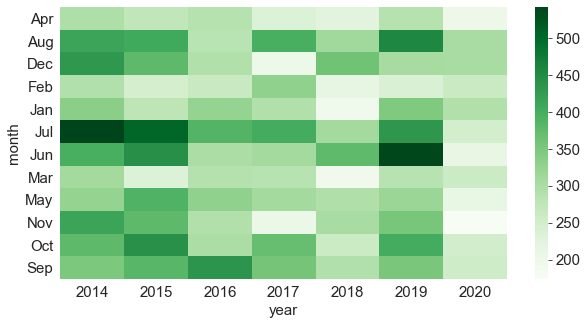

In [82]:
yearly_df = pd.DataFrame()

df_dict = { 'year'  : [],
            'month' : [],
           'values' : []
            }

for i in outtake_year_list:
    temp_year_df  =  animals_outcomes_df[animals_outcomes_df['Shelteryear'] == i]
    temp_month_df = temp_year_df.groupby('Sheltermonth').count()

    for p,q in zip((temp_month_df['Name'].index), (temp_month_df['Name'].values)):
        p = calendar.month_abbr[p]
        
        df_dict['year'].append(i)
        df_dict['month'].append(p)
        df_dict['values'].append(q)

        yearly_df = pd.DataFrame(data=df_dict, )

yearly_df = yearly_df.pivot('month', 'year', 'values') 

sns.heatmap(yearly_df,cmap='Greens');

**ANSWER : June is the most busy month of 2019!**

#### Q5: What is number of animals adopted who were stray ??

In [83]:
#animals_intakes_df.head()

In [84]:
#animals_outcomes_df.head()

In [85]:
animals_df = animals_outcomes_df.merge(animals_intakes_df, on='Animal ID')
animals_df = animals_df[['Outcome Type','Intake Type']]
animals_df

,Outcome Type,Intake Type
0,Adoption,Owner Surrender
1,Transfer,Stray
2,Transfer,Public Assist
3,Transfer,Owner Surrender
4,Adoption,Owner Surrender
...,...,...
33749,Transfer,Stray
33750,Adoption,Abandoned
33751,Adoption,Abandoned
33752,Adoption,Owner Surrender


In [86]:
animals_stray_df =  animals_df[animals_df['Intake Type'] == 'Stray']
animals_stray_adop_df = animals_stray_df[animals_stray_df['Outcome Type'] == 'Adoption']
animals_stray_adop_df[['Outcome Type','Intake Type']]

,Outcome Type,Intake Type
5,Adoption,Stray
7,Adoption,Stray
9,Adoption,Stray
15,Adoption,Stray
16,Adoption,Stray
...,...,...
33732,Adoption,Stray
33743,Adoption,Stray
33744,Adoption,Stray
33745,Adoption,Stray


**ANSWER : In all, 7.5k+ animals that were adopted were strays.**

#### Q6: What is most common color of animals being adopted  ??

In [87]:
color_df = animals_outcomes_df.groupby('Color').count()['Name']
color_dict = dict(color_df)
common_color = max(color_dict, key=color_dict.get)



**ANSWER :**

In [88]:
print('Most common color of animals being adopted : {}'.format(common_color))

Most common color of animals being adopted : Black/White


In [89]:
color_df[color_df.index == 'Black/White' ]

Color
Black/White    3076
Name: Name, dtype: int64

## Inferences and Conclusion


> - The austin animal shelter is doing thier best in helping the needed animals, they remained active even in the time when covid-19 hit in the year 2019.
> - They also help animals finding thier new families and getting them adopted.
> - In the year 2020 there were least cases of animals intakes.
> - Most animals int the shelter are stray animals.
> - Animals are getting spayed/neutered, which is a good thing.
> -  Majority of animals around 50k+ that were taken in by the shelter were strays, after that approximately 20k animals were surrenderd by their owners.
> - Most animals at the shelter are domestic animals like cats & dogs, some are livestocks and some exotic species like birds.
> - Around the months July & July, animals are being taken in large numbers from year 2014 to 2019 and during the month of may for the year 2014 to 2019 ,the shelter is heavily taking animals let it be stray, abandonded, surrenderd.

## References and Future Work



> 
>
> - Find more useful insights using some more interesting metrics.
> - Try to find the locality of animals where they were found in distressful conditions
> - Means to fill in missing data for the catgorical datasets
> - Explore more intutive graph plots

> Links to resources I found useful:
> - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
> - https://numpy.org/doc/stable/reference/index.html
> - https://matplotlib.org/stable/api/pyplot_summary.html
> - https://seaborn.pydata.org/api.html
> - https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name
> - https://stackoverflow.com/questions/23577505/how-to-avoid-overlapping-of-labels-autopct-in-a-matplotlib-pie-chart
> - https://www.analyticsvidhya.com/blog/2020/10/word-cloud-or-tag-cloud-in-python/ 

**Here is a good boy for you!!**

![image.png](https://media11.s-nbcnews.com/i/MSNBC/Components/Video/202003/DogAdoptionThumbnail.jpg)